<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_07_Interpolation_spline_detallada.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Spline interpolacion
  

In [1]:
!pip install -Uq celluloid

Presentado por Joan Mauricio Yanza Ruiz

In [2]:
import numpy as np
import matplotlib.pylab as plt
from numpy.linalg import solve
%matplotlib inline
#REF: Adaptado de  https://github.com/rrgalvan
from scipy import optimize
from matplotlib.animation import FuncAnimation
from celluloid import Camera
from IPython.display import HTML

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(0,3)$,$(1,3)$,$(2,5)$.

In [3]:
x0, x1, x2,x3,x4 = -1, 0, 0,1,2
_x = np.array([x0, x1, x2,x3,x4])
y0, y1, y2,y3,y4 =  5, 3, 3,3,5
_y = np.array([y0, y1, y2,y3,y4])

Para calcular los splines cúbicos debemos resolver el sistema de ecuaciones que define los coeficientes de los polinomios cúbicos en los subintervalos $[-1,0]$ y $[0,1]$. Empleando las condiciones del metodo de spline, y defiendo los polinomios para garantizar la continuidad en cada unos de los puntos, tenemos que:

Sean:
  * $s_0(x) = a_0 + b_0 (x-x_0) + c_0 (x-x_0)^2 + d_0 (x-x_0)^3$,
  * $s_1(x) = a_1 + b_1 (x-x_1) + c_1 (x-x_1)^2 + d_1 (x-x_1)^3$,
  * $s_2(x) = a_2 + b_2 (x-x_1) + c_2 (x-x_1)^2 + d_2 (x-x_1)^3$,

es decir:
  * $s_0(x) = a_0 + b_0 (x+1) + c_0 (x+1)^2 + d_0 (x+1)^3$,
  * $s_1(x) = a_1 + b_1 x + c_1 x^2 + d_1 x^3$.
  * $s_2(x) = a_2 + b_2 (x-1) + c_2 (x-1)^2 + d_2 (x-1)^3$,

Entonces
  * $s_0'(x) =  b_0 + 2 c_0 (x+1) + 3 d_0 (x+1)^2$,
  * $s_0''(x) = 2 c_0 + 6 d_0 (x+1)$,
  * $s_1'(x) =  b_1 + 2 c_1 x + 3 d_1 x^2$,
  * $s_1''(x) = 2 c_1 + 6 d_1 x$.
  * $s_2'(x) =  b_2 + 2 c_2 (x-1) + 3 d_2 (x-1)^2$.
  * $s_2''(x) = 2 c_2 + 6 d_2 (x-1)$,

Tenemos 8 incógnitas, $a_i$, $b_i$, $c_i$, $d_i$ con $i=1,2$. Las ecuaciones son:

  * Interpolación (y continuidad en 0 y en 1):

    * $s_0(-1) = 5$, es decir, $a_0=5$.
    * $s_0(0)  = 3$, es decir, $a_0+b_0+c_0+d_0=3$.
    * $s_1(0) = 3$, es decir, $a_1=3$.
    * $s_1(1)  = 3$, es decir, $a_1+b_1+c_1+d_1=3$.
    * $s_2(1) = 3$, es decir, $a_2=3$.
    * $s_2(2)  = 5$, es decir, $a_2+b_2+c_2+d_2=5$.
    
  * Derivabilidad:

    * $s_0'(0) = s_1'(0)$, es decir, $b_0+2c_0+3d_0 = b_1$.
    * $s_0''(0) = s_1''(0)$, es decir, $2c_0+6d_0 = 2c_1$.
    * $s_2'(1) = s_1'(1)$, es decir, $b_1+2c_1+3d_1 = b_2$.
    * $s_2''(1) = s_1''(1)$, es decir, $2c_1+6d_1= 2c_2$.


  * Condiciones naturales en los extremos, $-1$ y $1$:

    * $s_0''(-1) = 0$, es decir, $2c_0=0$.

    * $s_2''(2) = 0$, o sea $2c_2+6d_2=0$.


De estas ecuaciones tenemos directamente $a_0$, $a_1$, y $c_1$. Le damos valores a las variables en python:

Nos interesa las incognitas a1,b1,c1,d1,y a2,b2,c2,d2 ,es decir hay 8 incognitas

In [4]:
a2=3
a1 = 3
a0=5
c0 = 0

Así, podemos eliminar la primera, tercera y séptima ecuación, llegando a un sistema de cinco ecuaciones con cinco incógnitas ($b_0$, $d_0$, $b_1$, $c_1$, $d_1$):

 * $b_1+c_1+d_1=0$,
 * $b_2+c_2+d_2=2$,
 * $b_1+2c_1 + 3d_1-b_2=0$,
 * $2c_1+6d_1-2c_2=0$
 * $2c_2+6d_2=0$
 * $2c_1+6d_1=0$


La matriz y el segundo miembro asociados son:

In [5]:
A = np.array([
	[1, 1,1,   0,  0, 0],
	[ 0,0,0,    1, 1, 1],
	[ 1, 2,3,  -1,  0, 0],
	[ 0, 2,6,   0, -2, 0],
	[ 0, 0,0,   0,  2, 6],
	[ 0, 2,6,   0,  0, 0]

	])
b = np.array([0, 2, 0, 0, 0,0])

In [6]:
sol = solve(A,b)
print(sol)

[-4.  6. -2.  2.  0. -0.]


Ahora podemos resolver este sistema usando la función `solve()` (incluida en el modulo "linalg" del paquete *numpy*):

In [7]:
sol = solve(A,b)

# Definimos la solución como variables b1, d0, b1, c1 y d1
b1, c1, d1,b2,c2,d2 = sol

# Y mostramos los resultados
print ("b1, c1, d1= %f, %f, %f" % (b1, c1, d1))
print ("b2,c2,d2 = %f, %f, %f" % (b2,c2,d2))

b1, c1, d1= -4.000000, 6.000000, -2.000000
b2,c2,d2 = 2.000000, 0.000000, -0.000000


Para dibujar la gráfica, lo más fácil es definir los polinomios $s_0$,$s_1$, $s_2$ y representarlos gráficamente.

In [8]:
# para hallar los valores b0 y d0:
A1 = np.array([
	[ 1, 1,   0,  0, 0],
	[ 0, 0,   1,  1, 1],
	[ 1, 3,  -1,  0, 0],
	[ 0, 6,   0, -2, 0],
	[ 0, 0,   0,  2, 6]])
b1 = np.array([-2, 0, 0, 0, 0])

sol1 = solve(A1,b1)

# Definimos la solución como variables b0, d0, b1, c1 y d1
b0, d0, b1, c1, d1 = sol1

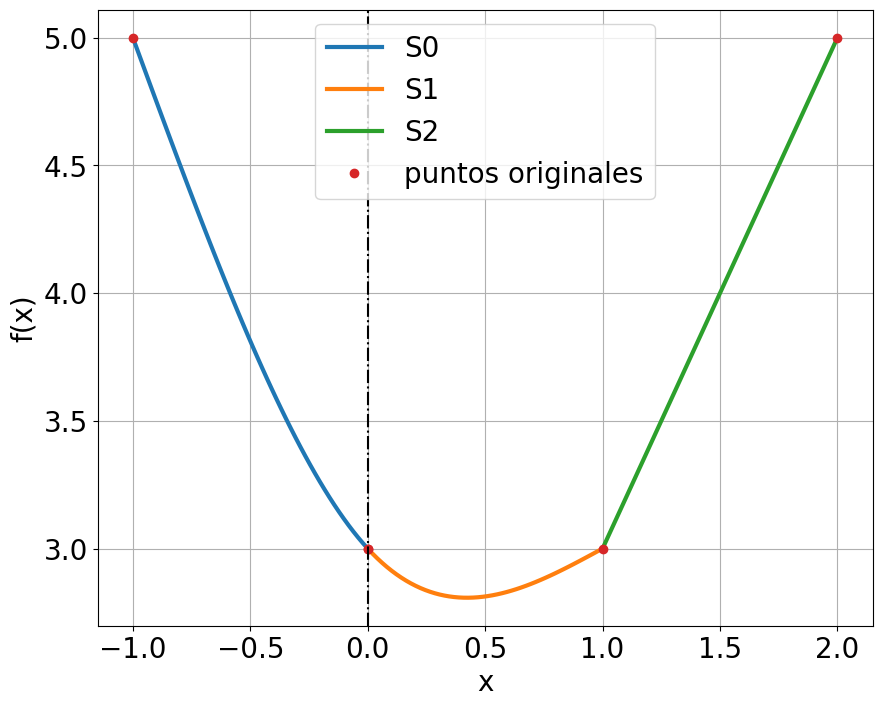

In [9]:
def s0(x):
    return a0 + b0*(x+1) + c0*(x+1)**2 + d0*(x+1)**3
def s1(x):
    return a1 + b1*x + c1*x**2 + d1*x**3

def s2(x):
    return a2 + b2*(x-1) + c2*(x-1)**2 + d2*(x-1)**3

xx0 = np.linspace(-1,0)
xx1 = np.linspace(0,1)
xx2 = np.linspace(1,2)

plt.figure(figsize=(10, 8))
plt.plot(xx0, s0(xx0), lw=3, label = "S0")
plt.plot(xx1, s1(xx1), lw=3, label = "S1")
plt.plot(xx2, s2(xx2), lw=3, label = "S2")
plt.plot(_x, _y, 'o', label="puntos originales")
plt.axvline(color = "k", ls="-.")
plt.ylabel("f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = "upper center", fontsize= 20)
plt.grid()
plt.show();

SEGUNDA PARTE: ANIMAR CON VECTORES EL MOVIMIENTO PARABOLICO

In [10]:
t=np.linspace(0,1.36,10)

vox = 2

voy = 3

y0 = 5

y = lambda t,y0,voy: y0 + voy*t - 4.9*(t**2)

x = lambda t: vox * t

vy = lambda t,voy:  voy - 9.8*t


In [11]:
tv = optimize.newton(y,3, args=(y0,voy))
tv

1.3616408604886328

In [12]:
t=np.linspace(0,tv,11)
y = lambda t: y0 + voy*t - 4.9*(t**2)

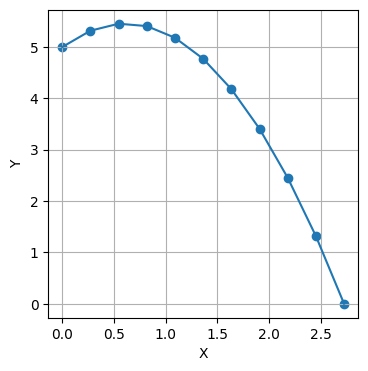

In [13]:
# poisicion en y vs x
Y_t=y(t)
X_t=x(t)
fig,ax= plt.subplots(figsize=(4,4)) # crea objeto figura y axes
ax.plot(X_t,Y_t)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.scatter(X_t,Y_t)
ax.grid()

In [14]:
v = (Y_t[1:]- Y_t[0:-1]) / ( t[1:] - t[0:-1])

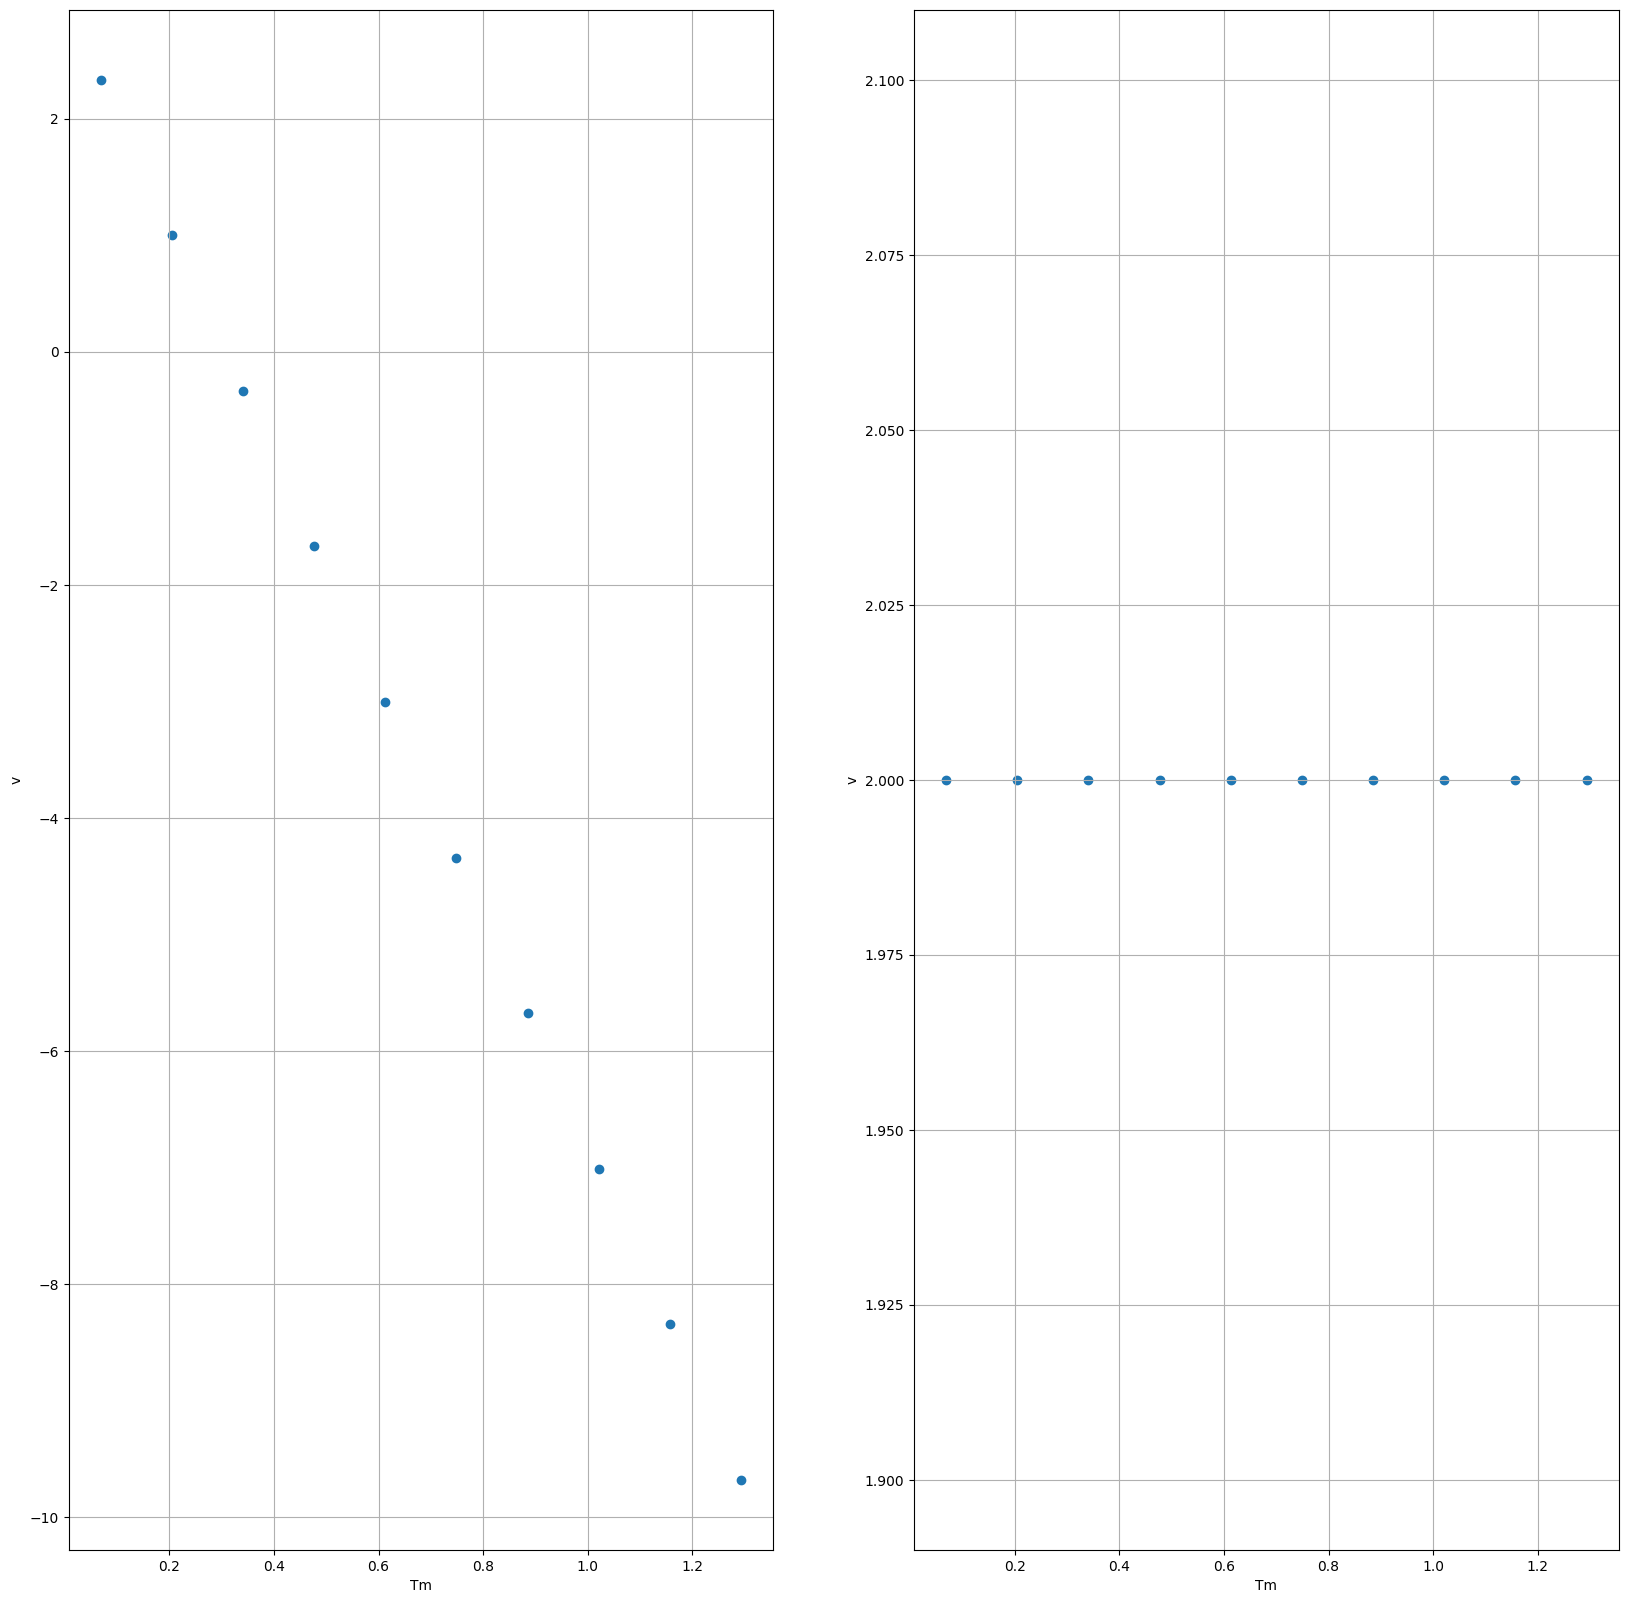

In [15]:
Tmean=  (t[1:] + t[0:-1]) / 2
vx = vox* np.ones(len(Tmean))
fig,ax= plt.subplots(ncols=2,nrows=1,figsize=(20,20)) # crea objeto figura y axes
#ax.plot(Tmean,v)
ax.flatten() #
ax[0].set_xlabel("Tm")
ax[0].set_ylabel("v")
ax[0].scatter(Tmean,v)
ax[0].grid()

ax[1].set_xlabel("Tm")
ax[1].set_ylabel("v")
ax[1].scatter(Tmean,vx)
ax[1].grid()

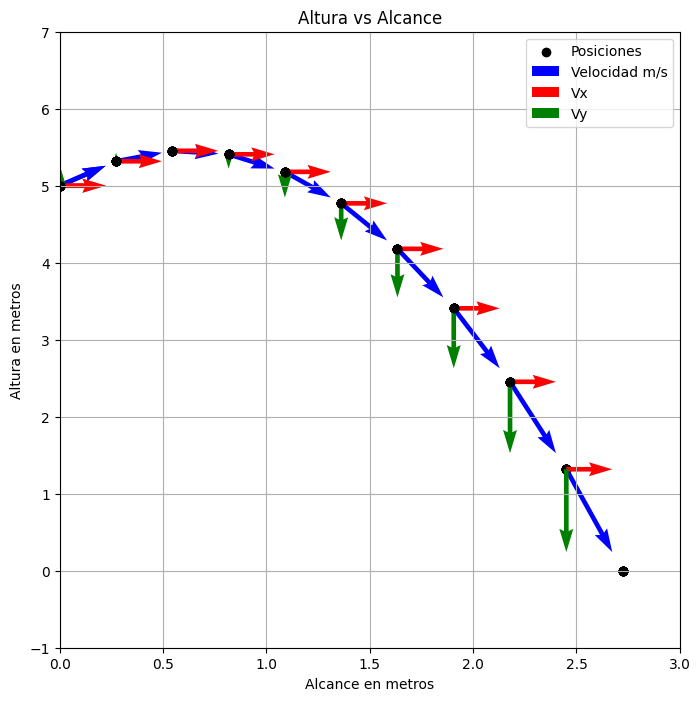

In [16]:
fig = plt.figure(figsize=(8, 8))
camara = Camera(fig) # creo el objeto camara con fig

#hacer el grafico solo del primer punto que aparece enla animacion con las etiquetas
plt.scatter(X_t[0],Y_t[0],color="black",label="Posiciones")
plt.quiver(X_t[0],Y_t[0],vx[0],v[0], angles='xy', scale_units='xy', scale=9, color="blue",label="Velocidad m/s")
plt.quiver(X_t[0],Y_t[0],vx[0],0, angles='xy', scale_units='xy', scale=9, color ="red", label="Vx")
plt.quiver(X_t[0],Y_t[0],0,v[0], angles='xy', scale_units='xy', scale=9, color= "green",label="Vy")



for i in range(0,len(t)-1):
  #plt.plot(X_t,Y_t,)
  plt.scatter(X_t,Y_t,color="black")


  plt.quiver(X_t[i],Y_t[i],vx[i],v[i], angles='xy', scale_units='xy', scale=9, color="blue")
  plt.quiver(X_t[i],Y_t[i],vx[i],0, angles='xy', scale_units='xy', scale=9, color ="red")
  plt.quiver(X_t[i],Y_t[i],0,v[i], angles='xy', scale_units='xy', scale=9, color= "green")

  camara.snap() #toma una foto de cada plot


plt.xlim(0,3)
plt.ylim(-1,7)
plt.xlabel("Alcance en metros")
plt.ylabel("Altura en metros")
plt.title("Altura vs Alcance")
plt.legend()
plt.grid()
plt.show();


In [17]:
animacion=camara.animate() # hace la animacion
HTML(animacion.to_jshtml())